In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# To display plots inline (only in Jupyter)
%matplotlib inline

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)


Pandas version: 1.5.3
Numpy version: 1.24.4


In [12]:
# Load dataset
df = pd.read_csv("world-happiness-report-2021.csv")

In [13]:
# Display first 5 rows
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [14]:
# 1. Overall Happiness Score
# ---------------------------
mean_score = round(df["Ladder score"].mean(), 2)
median_score = round(df["Ladder score"].median(), 2)
print(f"Mean Happiness Score: {mean_score}")
print(f"Median Happiness Score: {median_score}")


Mean Happiness Score: 5.53
Median Happiness Score: 5.53


In [15]:
# 2. Top and Bottom Countries
# ---------------------------
sorted_df = df.sort_values(by="Ladder score", ascending=False)
top5 = sorted_df.head(5)[["Country name", "Ladder score"]]
bottom5 = sorted_df.tail(5)[["Country name", "Ladder score"]]

print("\nTop 5 Happiest Countries:\n", top5.to_string(index=False))
print("\nBottom 5 Least Happy Countries:\n", bottom5.to_string(index=False))



Top 5 Happiest Countries:
 Country name  Ladder score
     Finland         7.842
     Denmark         7.620
 Switzerland         7.571
     Iceland         7.554
 Netherlands         7.464

Bottom 5 Least Happy Countries:
 Country name  Ladder score
     Lesotho         3.512
    Botswana         3.467
      Rwanda         3.415
    Zimbabwe         3.145
 Afghanistan         2.523


In [17]:
# 3. Percent Difference
# ---------------------------
highest = top5["Ladder score"].max()
lowest = bottom5["Ladder score"].min()
percent_diff = round(((highest - lowest) / lowest) * 100, 1)
print(f"\nPercent Difference between highest and lowest scoring countries: {percent_diff}%")


Percent Difference between highest and lowest scoring countries: 210.8%


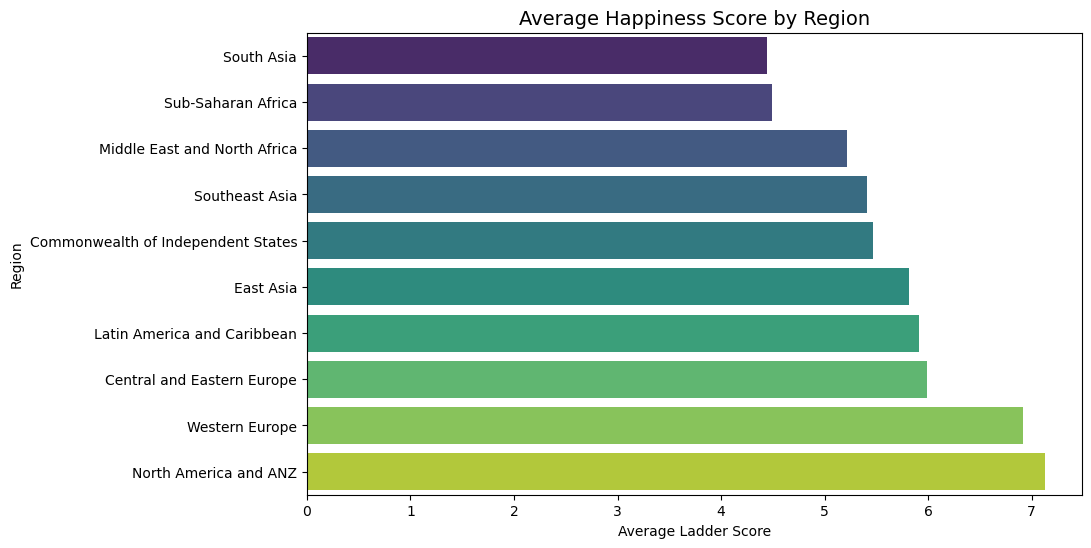

In [18]:
# 4. Average Happiness by Region
# ---------------------------
region_avg = df.groupby("Regional indicator")["Ladder score"].mean().sort_values()

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg.values, y=region_avg.index, palette="viridis")
plt.title("Average Happiness Score by Region", fontsize=14)
plt.xlabel("Average Ladder Score")
plt.ylabel("Region")
plt.show()



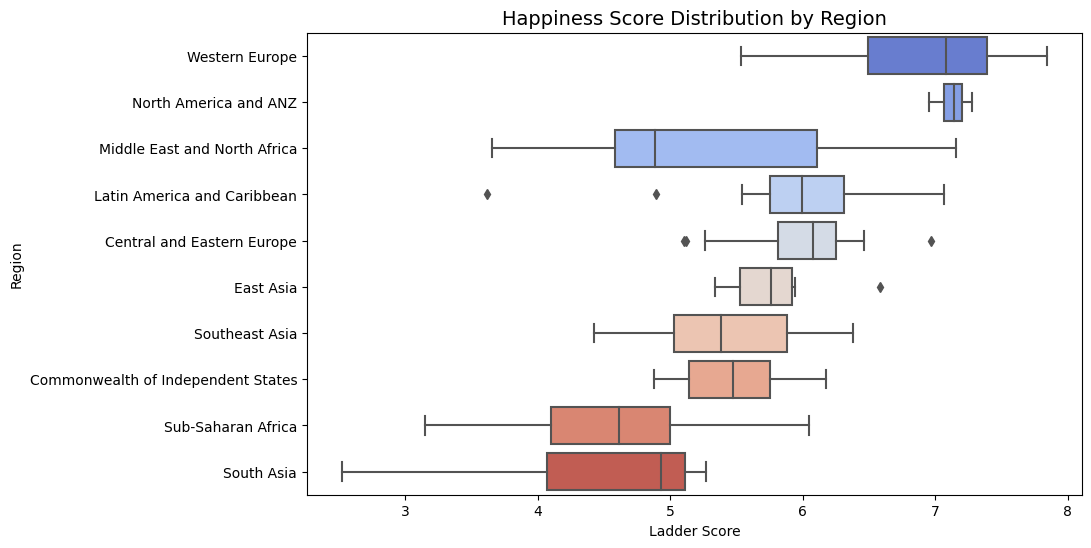

In [19]:
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x="Ladder score", y="Regional indicator", data=df, palette="coolwarm")
plt.title("Happiness Score Distribution by Region", fontsize=14)
plt.xlabel("Ladder Score")
plt.ylabel("Region")
plt.show()



In [20]:
# ---------------------------
# 5. Correlation Analysis
# ---------------------------
corr_gdp = round(df["Logged GDP per capita"].corr(df["Ladder score"]), 3)
corr_social = round(df["Social support"].corr(df["Ladder score"]), 3)

print(f"\nCorrelation with GDP per capita: {corr_gdp}")
print(f"Correlation with Social support: {corr_social}")



Correlation with GDP per capita: 0.79
Correlation with Social support: 0.757


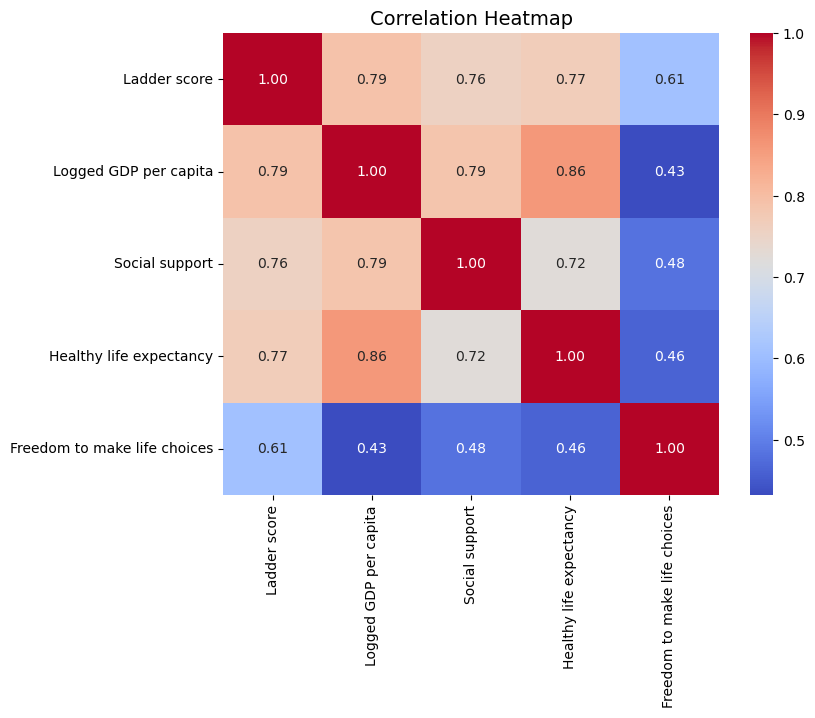

In [21]:

# Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[["Ladder score","Logged GDP per capita","Social support",
                "Healthy life expectancy","Freedom to make life choices"]].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()



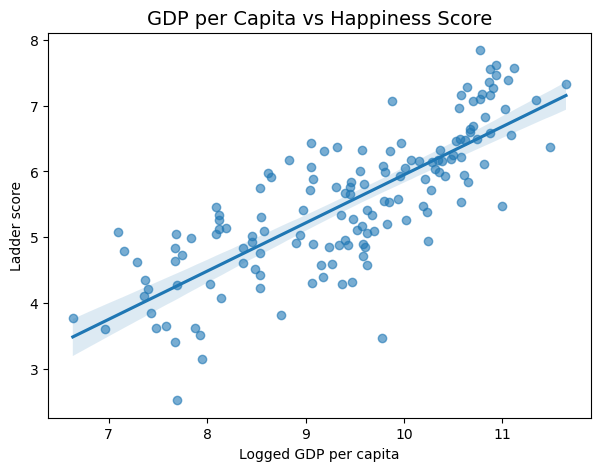

In [24]:
# Scatter plots
plt.figure(figsize=(7,5))
sns.regplot(x="Logged GDP per capita", y="Ladder score", data=df, scatter_kws={"alpha":0.6})
plt.title("GDP per Capita vs Happiness Score", fontsize=14)
plt.show()


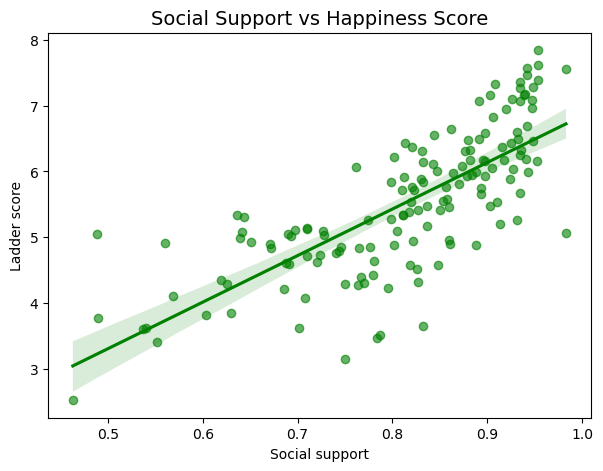

In [25]:
plt.figure(figsize=(7,5))
sns.regplot(x="Social support", y="Ladder score", data=df, scatter_kws={"alpha":0.6}, color="green")
plt.title("Social Support vs Happiness Score", fontsize=14)
plt.show()



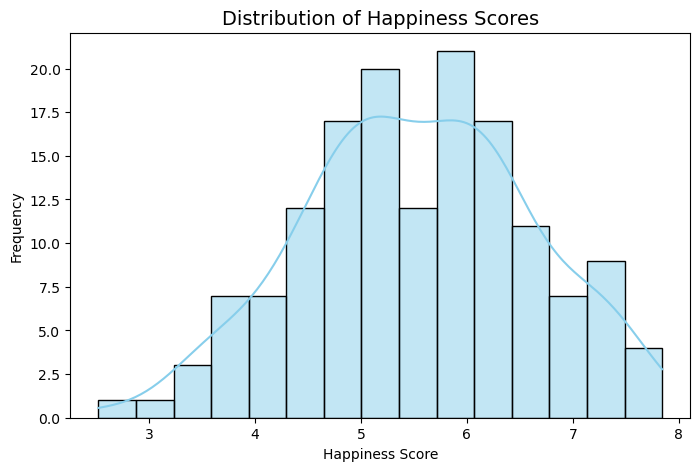

In [26]:
# Distribution of happiness scores
plt.figure(figsize=(8,5))
sns.histplot(df["Ladder score"], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Happiness Scores", fontsize=14)
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.show()


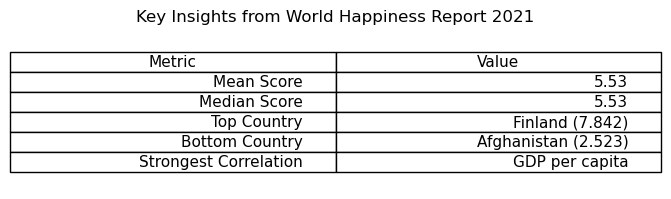

In [27]:
# ---------------------------
# 6. Insights Table (as Figure)
# ---------------------------
summary_data = {
    "Metric": ["Mean Score", "Median Score", "Top Country", "Bottom Country", "Strongest Correlation"],
    "Value": [
        mean_score,
        median_score,
        f"{top5.iloc[0]['Country name']} ({top5.iloc[0]['Ladder score']})",
        f"{bottom5.iloc[-1]['Country name']} ({bottom5.iloc[-1]['Ladder score']})",
        "GDP per capita" if corr_gdp > corr_social else "Social support"
    ]
}

summary_df = pd.DataFrame(summary_data)

fig, ax = plt.subplots(figsize=(7,2))
ax.axis("off")
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.2)
plt.title("Key Insights from World Happiness Report 2021", fontsize=12, pad=10)
plt.show()


In [29]:

# ---------------------------
# 7. Summary / Insights
# ---------------------------
print("\n Summary of World Happiness Report 2021 Analysis\n")
print(f"1. Overall global happiness lies around {mean_score} (mean) and {median_score} (median).")
print("2. Finland and other Nordic countries consistently top the rankings.")
print(f"3. The gap between happiest and least happy countries is {percent_diff}%.")
print("4. Regional differences are visible: Western Europe & North America score higher than Sub-Saharan Africa & South Asia.")
print(f"5. Correlations: GDP ({corr_gdp}) and Social Support ({corr_social}) are the strongest drivers of happiness.")
print("6. Insight: While wealth contributes strongly to happiness, social support is nearly equally important.")



 Summary of World Happiness Report 2021 Analysis

1. Overall global happiness lies around 5.53 (mean) and 5.53 (median).
2. Finland and other Nordic countries consistently top the rankings.
3. The gap between happiest and least happy countries is 210.8%.
4. Regional differences are visible: Western Europe & North America score higher than Sub-Saharan Africa & South Asia.
5. Correlations: GDP (0.79) and Social Support (0.757) are the strongest drivers of happiness.
6. Insight: While wealth contributes strongly to happiness, social support is nearly equally important.
